In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
d=pd.read_csv('covid.csv')
d

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
18322,18323,04/24/2020,Wyoming,US,2020-04-25 06:31:19,473.0,7.0,0.0
18323,18324,04/24/2020,Xinjiang,Mainland China,2020-04-25 06:31:19,76.0,3.0,73.0
18324,18325,04/24/2020,Yukon,Canada,2020-04-25 06:31:19,11.0,0.0,0.0
18325,18326,04/24/2020,Yunnan,Mainland China,2020-04-25 06:31:19,185.0,2.0,180.0


## Basic Information

In [3]:
d.shape

(18327, 8)

In [4]:
d.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [5]:
d.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [6]:
d.drop(['Province/State','Last Update','SNo'],axis=1,inplace=True)
d

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Mainland China,1.0,0.0,0.0
1,01/22/2020,Mainland China,14.0,0.0,0.0
2,01/22/2020,Mainland China,6.0,0.0,0.0
3,01/22/2020,Mainland China,1.0,0.0,0.0
4,01/22/2020,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
18322,04/24/2020,US,473.0,7.0,0.0
18323,04/24/2020,Mainland China,76.0,3.0,73.0
18324,04/24/2020,Canada,11.0,0.0,0.0
18325,04/24/2020,Mainland China,185.0,2.0,180.0


In [7]:
d.isnull().sum()

ObservationDate    0
Country/Region     0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [8]:
d['ObservationDate'] = pd.to_datetime(d['ObservationDate'])

In [15]:
d.dtypes

ObservationDate    datetime64[ns]
Country/Region             object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [13]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18327 entries, 0 to 18326
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ObservationDate  18327 non-null  datetime64[ns]
 1   Country/Region   18327 non-null  object        
 2   Confirmed        18327 non-null  float64       
 3   Deaths           18327 non-null  float64       
 4   Recovered        18327 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 716.0+ KB


In [12]:
d.describe()

,Confirmed,Deaths,Recovered
count,18327.000000,18327.000000,18327.000000
mean,3030.015551,180.680417,764.542424
std,15129.079515,1362.099905,5618.658958
min,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000
50%,101.000000,1.000000,2.000000
75%,674.500000,8.000000,71.000000
max,271590.000000,25969.000000,109800.000000


In [16]:
d.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Confirmed,18327.0,3030.015551,15129.079515,0.0,9.0,101.0,674.5,271590.0
Deaths,18327.0,180.680417,1362.099905,0.0,0.0,1.0,8.0,25969.0
Recovered,18327.0,764.542424,5618.658958,0.0,0.0,2.0,71.0,109800.0


In [17]:
d.head()

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0


In [18]:
d.tail()

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
18322,2020-04-24,US,473.0,7.0,0.0
18323,2020-04-24,Mainland China,76.0,3.0,73.0
18324,2020-04-24,Canada,11.0,0.0,0.0
18325,2020-04-24,Mainland China,185.0,2.0,180.0
18326,2020-04-24,Mainland China,1268.0,1.0,1256.0


## Grouping Cases as per the Date

In [20]:
date_wise = d.groupby(['ObservationDate']).agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})

In [21]:
date_wise.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


## Total Number of Confirmed Cases around the World

In [22]:
date_wise['Confirmed'].iloc[-1]

2811193.0

## Total Number of Recoverd Cases around the World

In [23]:
date_wise['Recovered'].iloc[-1]

793601.0

## Total Number of Deaths Cases around the World

In [25]:
date_wise['Deaths'].iloc[-1]

197159.0

## Total Number of Active Cases

In [26]:
date_wise['Confirmed'].iloc[-1]-date_wise['Recovered'].iloc[-1]-date_wise['Deaths'].iloc[-1]

1820433.0

## Total Number of Closed Cases

In [27]:
date_wise['Deaths'].iloc[-1]+date_wise['Recovered'].iloc[-1]

990760.0

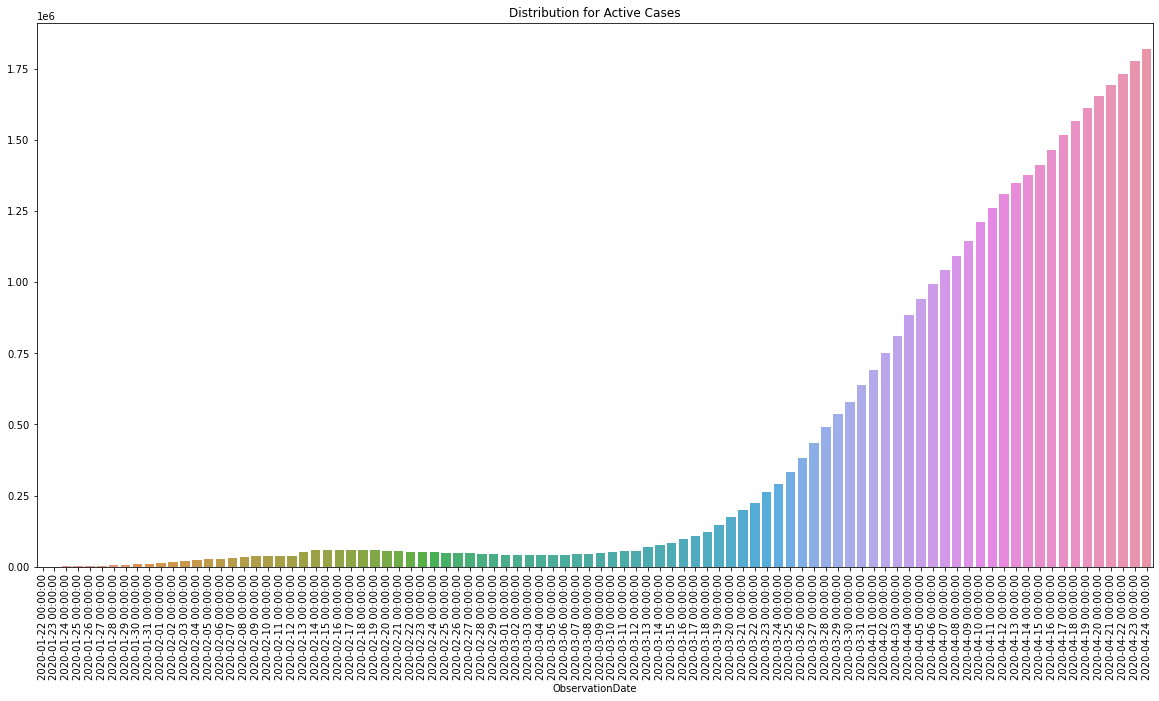

In [30]:
plt.figure(figsize=(20,10))
sns.barplot(x=date_wise.index,y=date_wise['Confirmed']-date_wise['Recovered']-date_wise['Deaths'])
plt.xticks(rotation=90)
plt.title('Distribution for Active Cases')
plt.show()

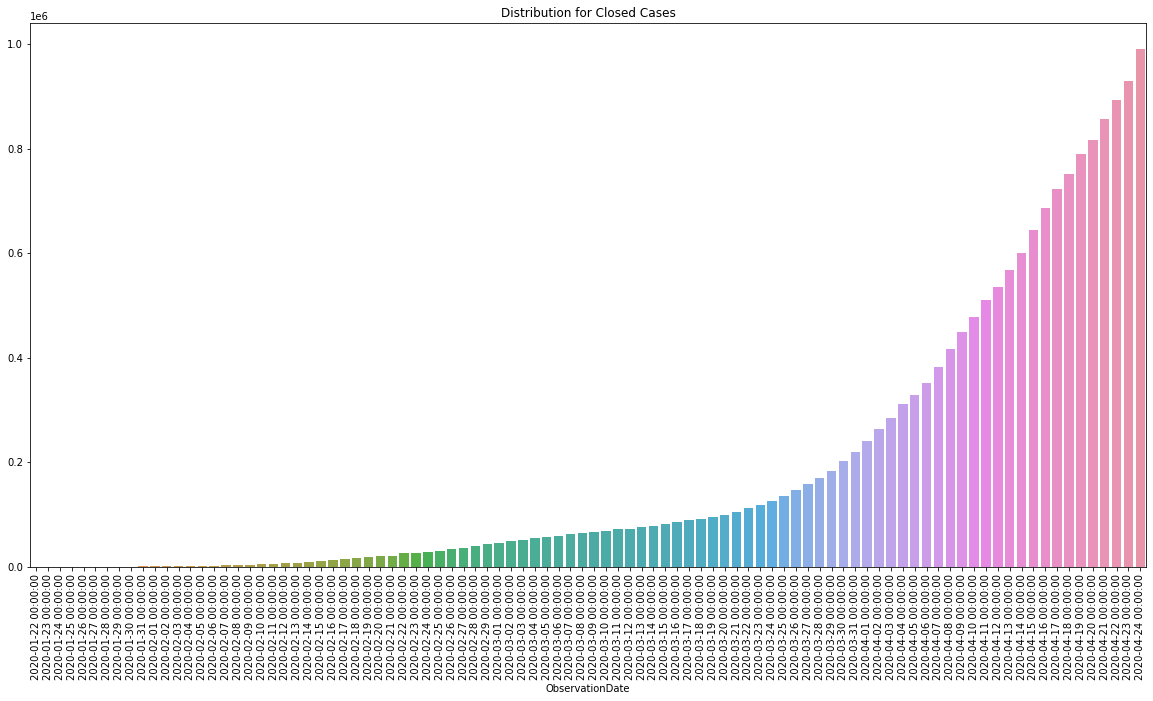

In [32]:
plt.figure(figsize=(20,10))
sns.barplot(x=date_wise.index,y=date_wise['Recovered']+date_wise['Deaths'])
plt.xticks(rotation=90)
plt.title('Distribution for Closed Cases')
plt.show()

In [33]:
date_wise['week'] = date_wise.index.weekofyear
date_wise

,Confirmed,Deaths,Recovered,week
ObservationDate,,,,
2020-01-22,555.0,17.0,28.0,4
2020-01-23,653.0,18.0,30.0,4
2020-01-24,941.0,26.0,36.0,4
2020-01-25,1438.0,42.0,39.0,4
2020-01-26,2118.0,56.0,52.0,4
...,...,...,...,...
2020-04-20,2472259.0,169986.0,645738.0,17
2020-04-21,2549123.0,176583.0,679819.0,17
2020-04-22,2623960.0,183066.0,709694.0,17


In [34]:
week_num=[]
week_confirmed=[]
week_deaths=[]
week_recovered=[]
w = 1
for i in list(date_wise['week'].unique()):
    week_confirmed.append(date_wise[date_wise['week']==i]['Deaths'].iloc[-1])
    week_deaths.append(date_wise[date_wise['week']==i]['Confirmed'].iloc[-1])
    week_recovered.append(date_wise[date_wise['week']==i]['Recovered'].iloc[-1])
    week_num.append(w)
    w = w + 1
   

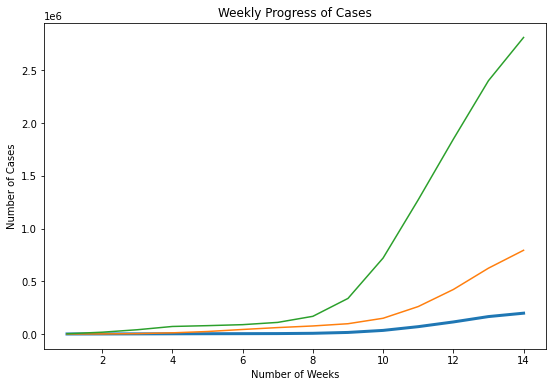

In [39]:
plt.figure(figsize=(9,6))
plt.plot(week_num,week_confirmed,linewidth=3)
plt.plot(week_num,week_recovered)
plt.plot(week_num,week_deaths)
plt.xlabel('Number of Weeks')
plt.ylabel('Number of Cases')
plt.title('Weekly Progress of Cases')
plt.show()

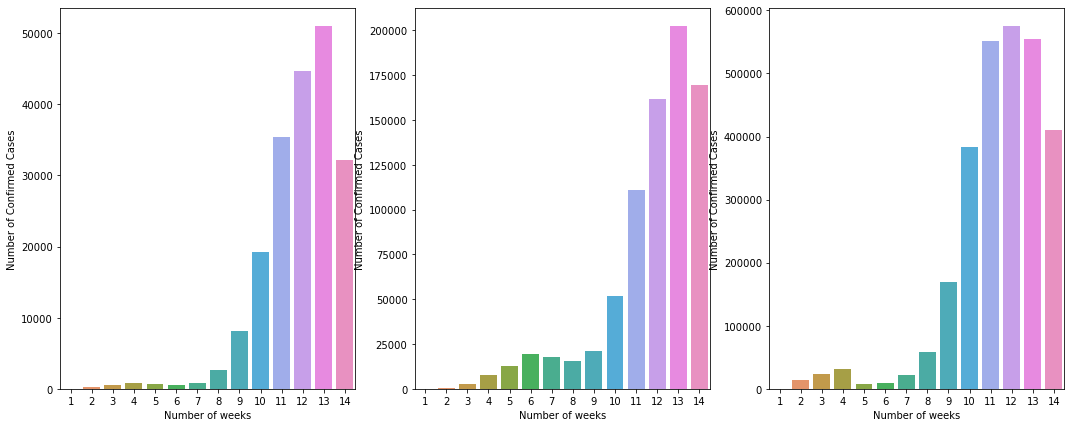

In [50]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,7))
sns.barplot(x=week_num,y=pd.Series(week_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(week_recovered).diff().fillna(0),ax=ax2)
sns.barplot(x=week_num,y=pd.Series(week_deaths).diff().fillna(0),ax=ax3)
ax1.set_xlabel('Number of weeks')
ax2.set_xlabel('Number of weeks')
ax3.set_xlabel('Number of weeks')
ax1.set_ylabel('Number of Confirmed Cases')
ax2.set_ylabel('Number of Confirmed Cases')
ax3.set_ylabel('Number of Confirmed Cases')
plt.show()

## Average increase in Number  of Confirmed Cases Everyday

In [51]:
np.round(date_wise['Confirmed'].diff().fillna(0).mean())

29900.0

## Average increase in Number  of Recovered Cases Everyday

In [52]:
np.round(date_wise['Recovered'].diff().fillna(0).mean())

8442.0

## Average increase in Number  of Confirmed Cases Everyday

In [53]:
np.round(date_wise['Deaths'].diff().fillna(0).mean())

2097.0

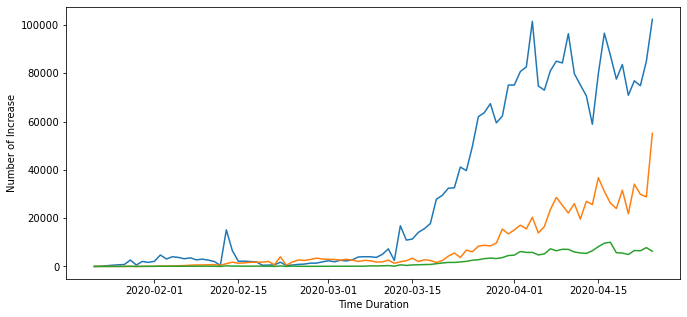

In [56]:
plt.figure(figsize=(11,5))
plt.plot(date_wise['Confirmed'].diff().fillna(0),label='Daily increase in Confirmed Case')
plt.plot(date_wise['Recovered'].diff().fillna(0),label='Daily increase in Recovered Case')
plt.plot(date_wise['Deaths'].diff().fillna(0),label='Daily increase in Death Case')
plt.xlabel('Time Duration')
plt.ylabel('Number of Increase')
plt.show()

In [58]:
country_wise=d[d['ObservationDate']==d['ObservationDate'].max()].groupby(['Country/Region']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'}).sort_values(['Confirmed'],ascending=False)
country_wise

,Confirmed,Recovered,Deaths
Country/Region,,,
US,905333.0,99079.0,51949.0
Spain,219764.0,92355.0,22524.0
Italy,192994.0,60498.0,25969.0
France,159952.0,44271.0,22279.0
Germany,154999.0,109800.0,5760.0
...,...,...,...
Bhutan,7.0,3.0,0.0
Western Sahara,6.0,5.0,0.0
South Sudan,5.0,0.0,0.0


In [59]:
country_wise['Mortality']=(country_wise['Deaths']/country_wise['Recovered'])*100
country_wise

,Confirmed,Recovered,Deaths,Mortality
Country/Region,,,,
US,905333.0,99079.0,51949.0,52.431898
Spain,219764.0,92355.0,22524.0,24.388501
Italy,192994.0,60498.0,25969.0,42.925386
France,159952.0,44271.0,22279.0,50.324140
Germany,154999.0,109800.0,5760.0,5.245902
...,...,...,...,...
Bhutan,7.0,3.0,0.0,0.000000
Western Sahara,6.0,5.0,0.0,0.000000
South Sudan,5.0,0.0,0.0,NaN


In [ ]:
country_wise['Recovered']=(country_wise['Recovered']/country_wise['Confirmed'])*100
country_wise['Recovered']

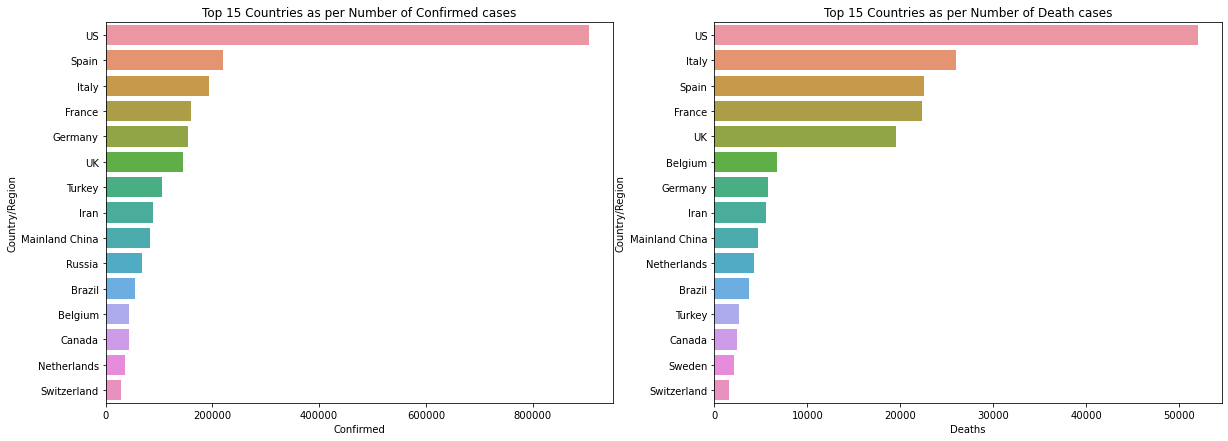

In [60]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,7))
top15_confirmed=country_wise.sort_values(['Confirmed'],ascending=False).head(15)
top15_death=country_wise.sort_values(['Deaths'],ascending=False).head(15)
sns.barplot(x=top15_confirmed['Confirmed'],y=top15_confirmed.index,ax=ax1)
sns.barplot(x=top15_death['Deaths'],y=top15_death.index,ax=ax2)
ax1.set_title('Top 15 Countries as per Number of Confirmed cases')
ax2.set_title('Top 15 Countries as per Number of Death cases')
plt.show()